In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

# Information about data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [7]:
print ("Rows: " , df.shape[0])
print ("Columns: " , df.shape[1])
print ("\nFeatures: ", df.columns.tolist())
print ("\nMissing values:  ", df.isnull().sum().values.sum())
print ("\nUnique values: \n", df.nunique())

Rows:  1338
Columns:  7

Features:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values:   0

Unique values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [8]:
df.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [9]:
df.describe(include='object')

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

# Exploratory Data Analysis 

In [13]:
sns.set(style = 'darkgrid')
#sns.set(rc = {'figure.figsize':(15,8)})

## Univariate Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

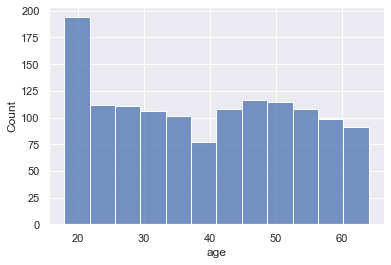

In [14]:
sns.histplot(data = df, x = 'age')

<AxesSubplot:xlabel='age'>

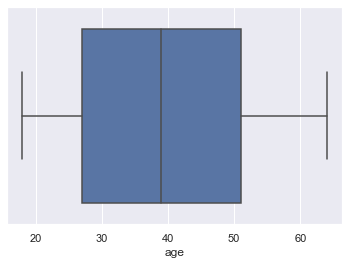

In [15]:
sns.boxplot(x = df['age'])

<AxesSubplot:xlabel='sex', ylabel='count'>

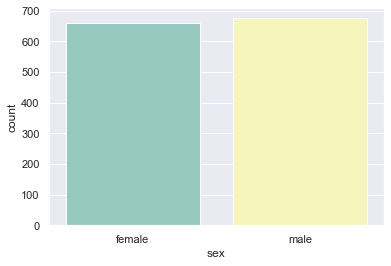

In [16]:
sns.countplot(x = 'sex', data = df, palette = 'Set3')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

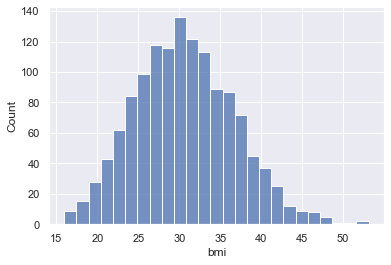

In [17]:
sns.histplot(data = df, x = 'bmi')

<AxesSubplot:xlabel='bmi'>

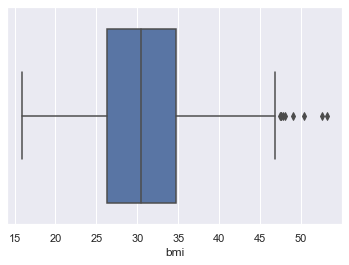

In [18]:
sns.boxplot(x = df['bmi'])

<AxesSubplot:xlabel='children', ylabel='count'>

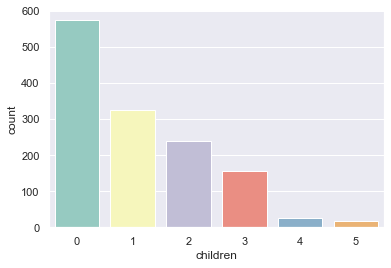

In [19]:
sns.countplot(x = 'children', data = df, palette = 'Set3')

<AxesSubplot:xlabel='smoker', ylabel='count'>

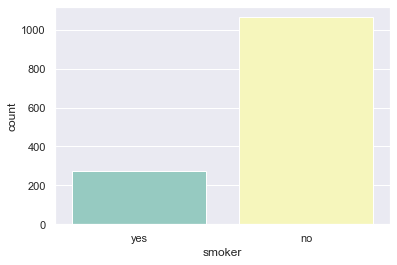

In [20]:
sns.countplot(x = 'smoker', data = df, palette = 'Set3')

In [21]:
import plotly.express as px


content = df['smoker'].value_counts().sort_values(ascending = False).reset_index()


fig = px.pie(content, values = 'smoker', names = 'index', 
             color_discrete_map= 'identity',
             labels = {'index': 'smoker', 'type': 'Count'},
             title = 'Smoker?')
fig.show()

<AxesSubplot:xlabel='region', ylabel='count'>

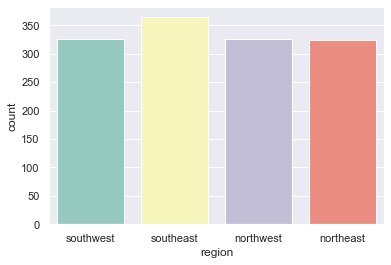

In [22]:
sns.countplot(x = 'region', data = df, palette = 'Set3')

<AxesSubplot:xlabel='charges', ylabel='Count'>

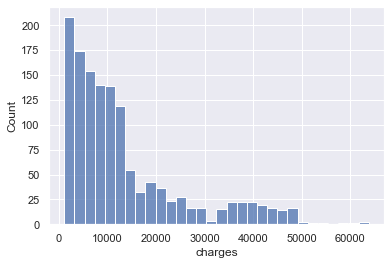

In [23]:
sns.histplot(data = df, x = 'charges')

<AxesSubplot:xlabel='charges'>

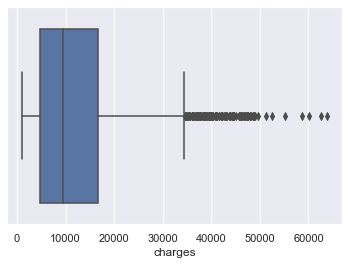

In [24]:
sns.boxplot(x = df['charges'])

### Finding outliers in df['bmi']

In [25]:
bmi_sorted = sorted(df['bmi']) #sorting data

In [26]:
q1, q3 = np.percentile(bmi_sorted, [25,75]) #Finding first quartile and third quartile
print(q1, ' ', q3)

26.29625   34.69375


In [27]:
iqr = q3 - q1 #Find the IQR 
print(iqr)

8.3975


In [28]:
#Find lower and upper bound, anything outside is an outlier
lower_bound = q1 -(1.5 * iqr) #lower bound
upper_bound = q3 +(1.5 * iqr) #upper bound
print(lower_bound, ' ', upper_bound)

13.7   47.290000000000006


In [29]:
outliers_upper = []
for i in bmi_sorted:
    if i > upper_bound:
        outliers_upper.append(i)
        
print(outliers_upper)
print(len(outliers_upper))

[47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]
9


### Finding outliers in charges

In [30]:
charges_sorted = sorted(df['charges']) #sorting data

In [31]:
q1, q3 = np.percentile(charges_sorted, [25,75]) #Finding first quartile and third quartile
print(q1, ' ', q3)

4740.28715   16639.912515


In [32]:
iqr = q3 - q1 #Find the IQR 
print(iqr)

11899.625365


In [33]:
#Find lower and upper bound, anything outside is an outlier
lower_bound = q1 -(1.5 * iqr) #lower bound
upper_bound = q3 +(1.5 * iqr) #upper bound
print(lower_bound, ' ', upper_bound)

-13109.1508975   34489.350562499996


In [34]:
outliers_upper = []
for i in charges_sorted:
    if i > upper_bound:
        outliers_upper.append(i)
        
print(outliers_upper)
print('Number of positive outliers: ', len(outliers_upper))

[34617.84065, 34672.1472, 34779.615, 34806.4677, 34828.654, 34838.873, 35069.37452, 35147.52848, 35160.13457, 35491.64, 35585.576, 35595.5898, 36021.0112, 36085.219, 36124.5737, 36149.4835, 36189.1017, 36197.699, 36219.40545, 36307.7983, 36397.576, 36580.28216, 36837.467000000004, 36898.73308, 36910.60803, 36950.2567, 37079.372, 37133.8982, 37165.1638, 37270.1512, 37465.34375, 37484.4493, 37607.5277, 37701.8768, 37742.5757, 37829.7242, 38126.2465, 38245.59327, 38282.7495, 38344.566, 38415.474, 38511.6283, 38709.176, 38711.0, 38746.3551, 38792.6856, 38998.546, 39047.285, 39125.33225, 39241.442, 39556.4945, 39597.4072, 39611.7577, 39722.7462, 39725.51805, 39727.614, 39774.2763, 39836.519, 39871.7043, 39983.42595, 40003.33225, 40103.89, 40182.246, 40273.6455, 40419.0191, 40720.55105, 40904.1995, 40932.4295, 40941.2854, 40974.1649, 41034.2214, 41097.16175, 41661.602, 41676.0811, 41919.097, 41949.2441, 41999.52, 42111.6647, 42112.2356, 42124.5153, 42211.1382, 42303.69215, 42560.4304, 42760.

## Bivariate analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

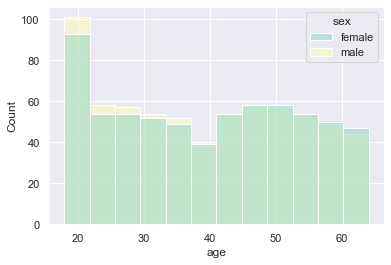

In [35]:
sns.histplot(data = df, x = 'age', hue = 'sex', palette = 'Set3')

<AxesSubplot:xlabel='age', ylabel='Count'>

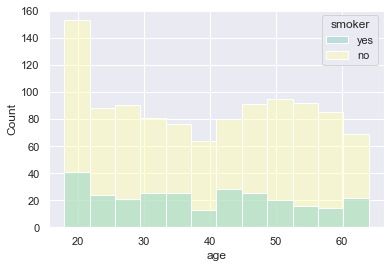

In [36]:
sns.histplot(data = df, x = 'age', hue = 'smoker', palette = 'Set3')

<AxesSubplot:xlabel='sex', ylabel='count'>

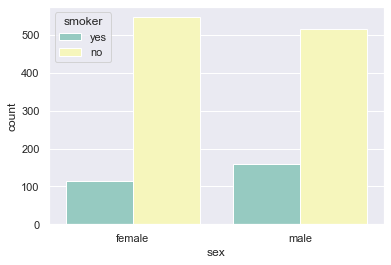

In [37]:
sns.countplot(x = 'sex', data = df, palette = 'Set3', hue = 'smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

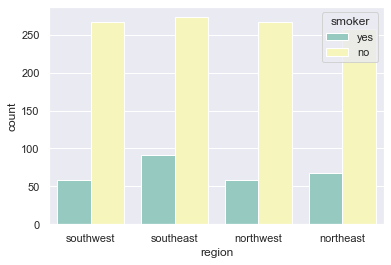

In [38]:
sns.countplot(x = 'region', data = df, palette = 'Set3', hue = 'smoker')

[Text(0.5, 1.0, 'Smoker vs Charges')]

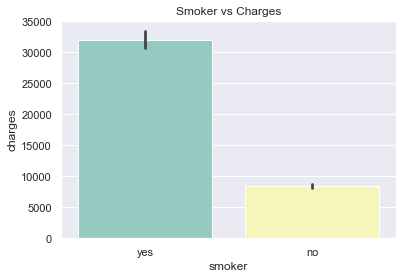

In [39]:
sns.barplot(x = df['smoker'], y = df['charges'], palette = 'Set3').set(title = 'Smoker vs Charges')

### Multivariate analysis

<AxesSubplot:>

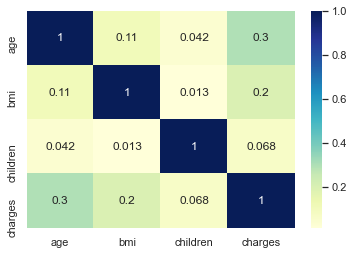

In [40]:
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )

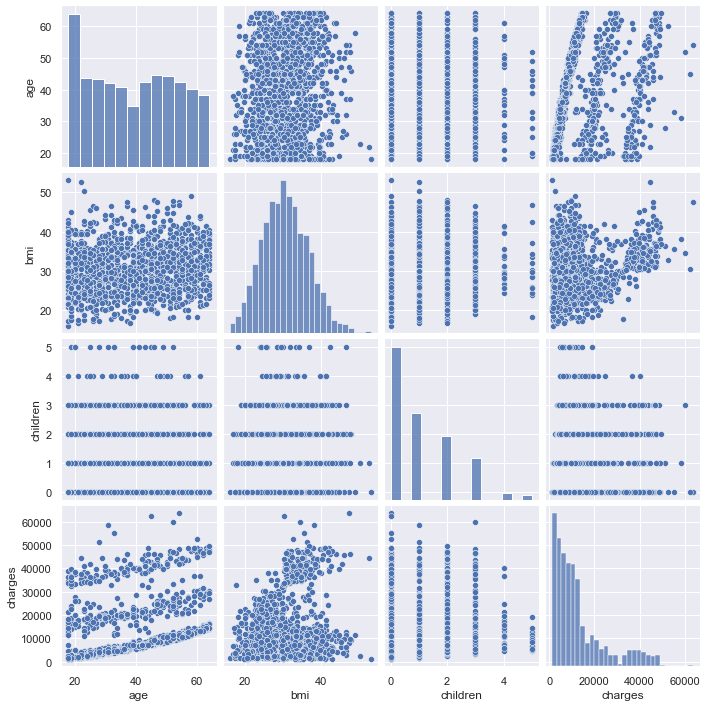

In [41]:
sns.pairplot(data = df)
plt.show()

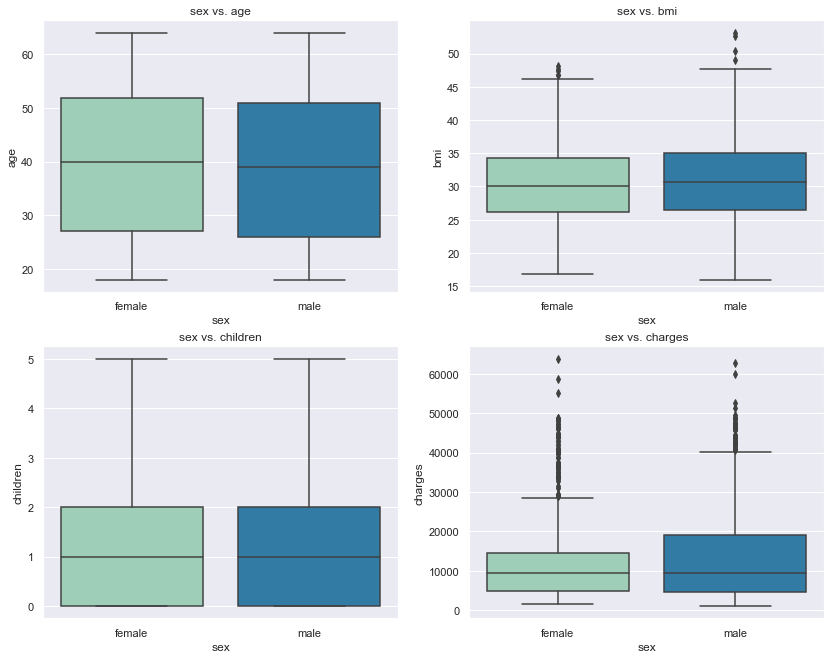

In [42]:
#sex vs all numerical variables
fig1, axes1 = plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col =  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(y = df[list_col[i]], x = df['sex'], ax = ax, palette = "YlGnBu", orient='v').set(title = 'sex vs. '+ list_col[i])

Observations for sex vs. all 
 - Average 'age' of females is slightly higher than average 'age' of males
 - Male population has higher mean of 'bmi', wider range and more positive/upper outliers
 - Both females and males have almost identical distribution for 'children'
 - Male population has wider interquartile range for 'charges'


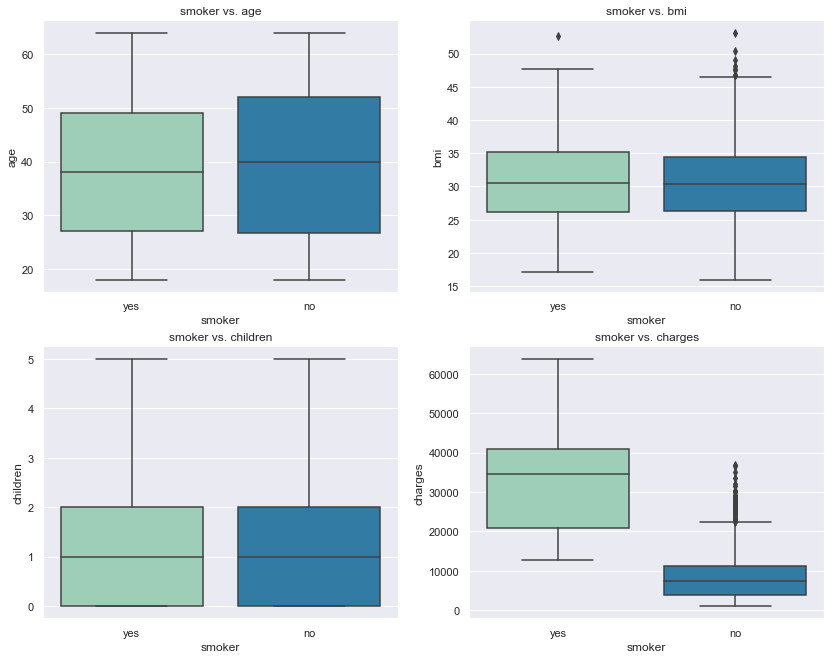

In [43]:
#smoker vs all numerical variables
fig1, axes1 = plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col =  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(y = df[list_col[i]], x = df['smoker'], ax = ax, palette = "YlGnBu", orient='v').set(title = 'smoker vs. '+ list_col[i])

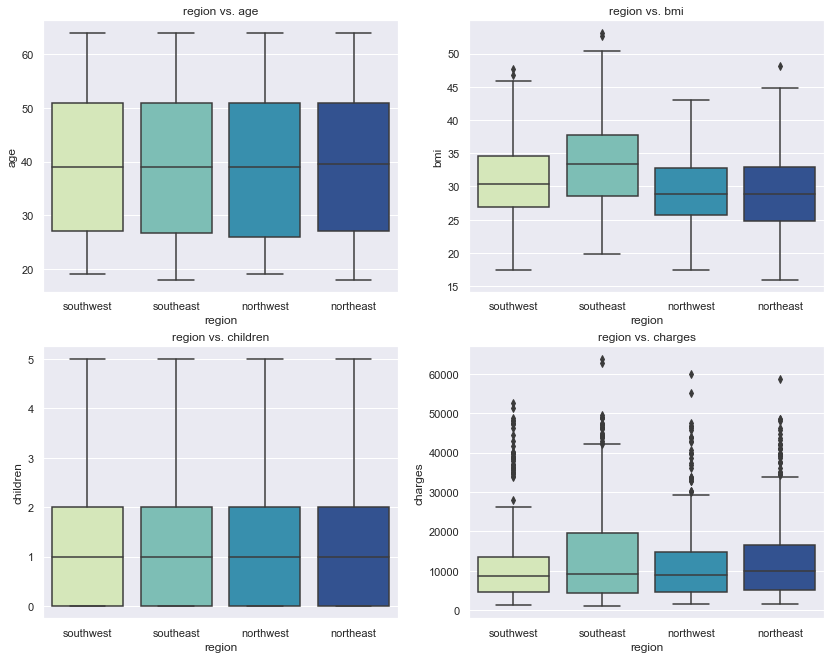

In [44]:
#region vs all numerical variable
fig1, axes1 = plt.subplots(2,2,figsize=(14, 11))

#select all quantitative columns for checking the outliers
list_col =  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(y = df[list_col[i]], x = df['region'], ax = ax, palette = "YlGnBu", orient='v').set(title = 'region vs. '+ list_col[i])

## BMI vs. charges

Second one important, rest no info.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

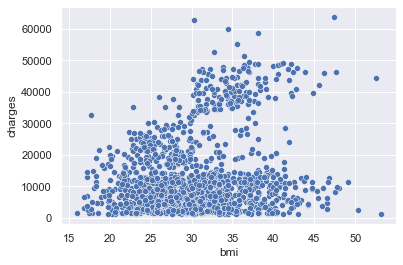

In [45]:
sns.scatterplot(data = df, x = 'bmi', y = 'charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

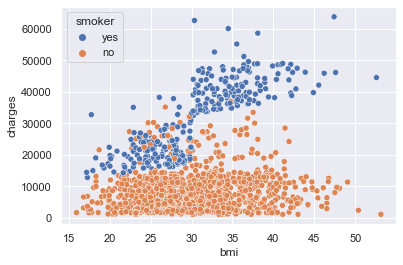

In [46]:
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'smoker')

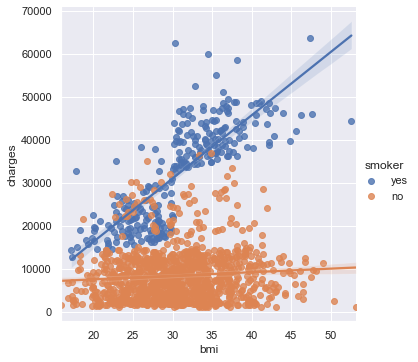

In [47]:
sns.lmplot(data = df, x = 'bmi', y = 'charges', hue = 'smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

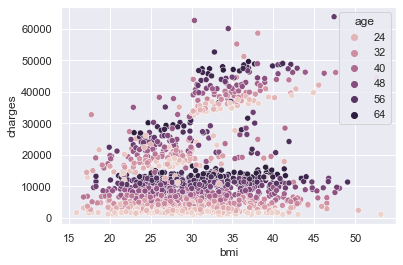

In [48]:
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'age')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

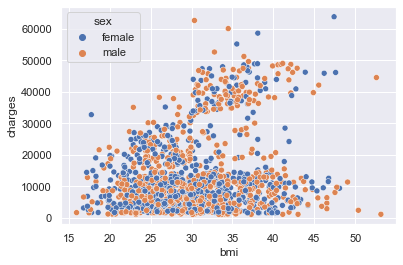

In [49]:
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'sex')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

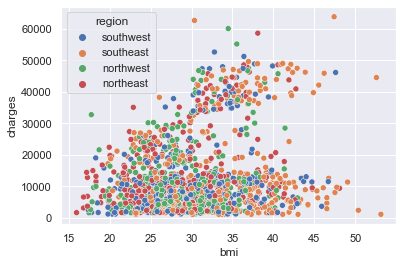

In [50]:
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'region')

### Age vs. charges

<AxesSubplot:xlabel='age', ylabel='charges'>

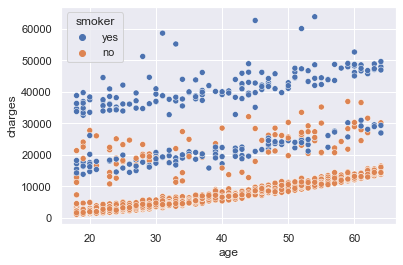

In [51]:
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker')

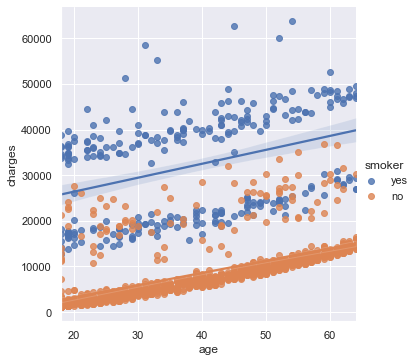

In [52]:
sns.lmplot(data = df, x = 'age', y = 'charges', hue = 'smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

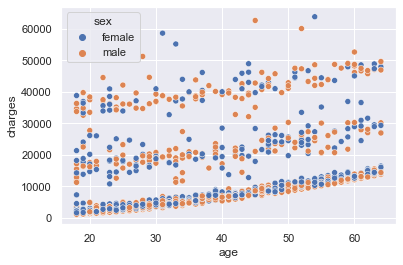

In [53]:
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex')

# Simple Linear Regression

### Simple Linear Regression using independent feature age

In [54]:
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, -1].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
print(regressor.coef_)
print(regressor.intercept_)

[247.90264149]
3337.2758329388907


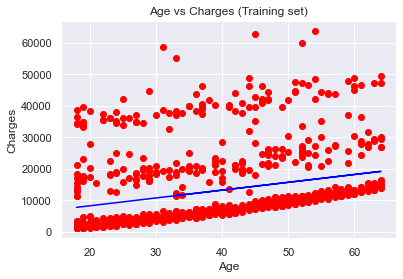

In [59]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Age vs Charges (Training set)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

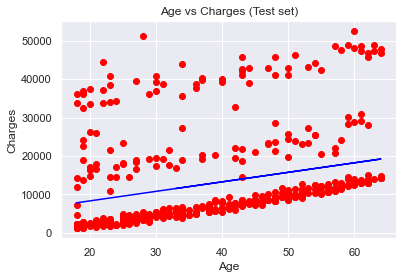

In [60]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Age vs Charges (Test set)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Simple Linear Regression using independent feature bmi

In [61]:
X = df.iloc[:, 2].values.reshape(-1, 1)
y = df.iloc[:, -1].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [63]:
print(regressor.coef_)
print(regressor.intercept_)

[339.52829171]
2725.6360132012196


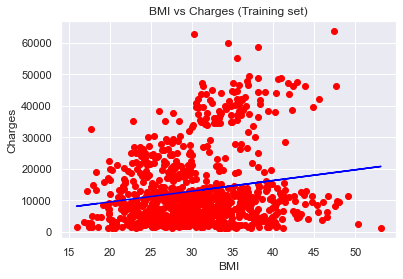

In [64]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('BMI vs Charges (Training set)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

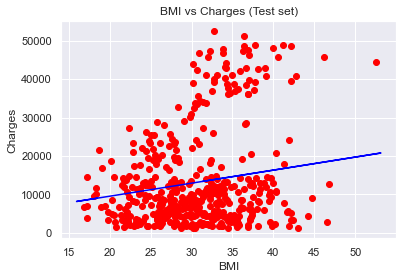

In [65]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('BMI vs Charges (Test set)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Multiple Linear Regression

In [66]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [67]:
#Splitting independent and dependent features
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 

In [68]:
#One Hot Encoding of categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,4,5])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [69]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred = regressor.predict(X_test)

In [72]:
print(regressor.coef_)
print(regressor.intercept_)

[    29.67317561    -29.67317561 -11756.79680282  11756.79680282
    675.68142042    195.64386625   -454.24891486   -417.07637181
    253.45601931    325.04967431    459.59985853]
-236.52425785221385


In [73]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[11015.74  9724.53]
 [ 9500.84  8547.69]
 [37956.97 45702.02]
 [16108.87 12950.07]
 [ 7025.4   9644.25]
 [ 4218.13  4500.34]
 [ 1827.92  2198.19]
 [14363.98 11436.74]
 [ 9061.87  7537.16]
 [ 7506.25  5425.02]
 [ 4884.28  6753.04]
 [10346.8  10493.95]
 [ 8696.47  7337.75]
 [ 3848.11  4185.1 ]
 [27793.47 18310.74]
 [10787.1  10702.64]
 [11285.22 12523.6 ]
 [ 6263.01  3490.55]
 [ 8234.13  6457.84]
 [27209.55 33475.82]
 [33591.31 23967.38]
 [14337.91 12643.38]
 [11927.66 23045.57]
 [32054.26 23065.42]
 [ 4075.72  1674.63]
 [ 9358.61  4667.61]
 [ 1428.91  3732.63]
 [ 9825.78  7682.67]
 [ 3806.02  3756.62]
 [10409.76  8413.46]
 [ 9074.71  8059.68]
 [39822.4  48970.25]
 [15431.06 12979.36]
 [13624.36 20630.28]
 [24978.59 14571.89]
 [ 5394.35  4137.52]
 [12508.08  8347.16]
 [30461.7  51194.56]
 [33456.53 40003.33]
 [ 3512.55  1880.49]
 [ 4290.31  5458.05]
 [ 3954.87  2867.12]
 [30635.63 20149.32]
 [39318.1  47496.49]
 [27635.99 36149.48]
 [ 5096.4  26018.95]
 [10679.84 19749.38]
 [ 7831.08  6